In [122]:
import pandas as pd
import datetime as dt

In [123]:
df=pd.read_csv(r"D:\nyc-rolling-sales_clean.csv")

In [124]:
df.describe()

,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,"42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00","42,692.00"
mean,1.43,"5,178.71",203.67,"10,998.21",2.52,0.26,2.80,"3,579.19","3,851.48","1,865.09","1,175,657.91"
std,0.86,"3,485.08",476.30,673.08,18.54,11.68,22.04,"33,390.81","31,313.03",387.22,"14,205,298.85"
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,"2,371.00",21.00,"10,469.00",1.00,0.00,1.00,"1,600.00","1,031.00","1,920.00","127,281.00"
50%,1.00,"4,856.50",44.00,"11,217.00",1.00,0.00,1.00,"2,200.00","1,624.00","1,931.00","478,000.00"
75%,2.00,"7,266.25",82.00,"11,249.00",2.00,0.00,2.00,"3,300.00","2,400.00","1,961.00","800,000.00"
max,4.00,"16,319.00","9,009.00","11,694.00","1,844.00","2,261.00","2,261.00","4,228,300.00","3,750,565.00","2,017.00","2,210,000,000.00"


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42692 entries, 0 to 42691
Data columns (total 16 columns):
NEIGHBORHOOD                 42692 non-null object
BUILDING CLASS CATEGORY      42692 non-null object
TAX CLASS AT PRESENT         42692 non-null int64
BLOCK                        42692 non-null int64
LOT                          42692 non-null int64
BUILDING CLASS AT PRESENT    42692 non-null object
ADDRESS                      42692 non-null object
ZIP CODE                     42692 non-null int64
RESIDENTIAL UNITS            42692 non-null int64
COMMERCIAL UNITS             42692 non-null int64
TOTAL UNITS                  42692 non-null int64
LAND SQUARE FEET             42692 non-null int64
GROSS SQUARE FEET            42692 non-null int64
YEAR BUILT                   42692 non-null int64
SALE PRICE                   42692 non-null int64
SALE DATE                    42692 non-null object
dtypes: int64(11), object(5)
memory usage: 5.2+ MB


In [126]:
df.head(5)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016-11-07 00:00:00
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017-06-21 00:00:00
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016-09-28 00:00:00
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016-12-30 00:00:00
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017-01-30 00:00:00


# -------------Part 1: Feature Engineering-----------------

# Create a new column "year of sale" by extracting year information from "SALE DATE" column.

In [127]:
df["SALE DATE"].head(10)

0    2016-11-07 00:00:00
1    2017-06-21 00:00:00
2    2016-09-28 00:00:00
3    2016-12-30 00:00:00
4    2017-01-30 00:00:00
5    2017-01-30 00:00:00
6    2017-01-30 00:00:00
7    2017-04-17 00:00:00
8    2017-02-02 00:00:00
9    2017-02-06 00:00:00
Name: SALE DATE, dtype: object

In [128]:
df['datetimeindex']=pd.DatetimeIndex(df["SALE DATE"]).year #method 1

In [129]:
df["todatetime"]=pd.DatetimeIndex(pd.to_datetime(df["SALE DATE"],format='%Y-%m-%d')).year  #method 2

In [130]:
df.query('datetimeindex!=todatetime') #both yield same results

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,datetimeindex,todatetime


In [131]:
df["year of sale"]=pd.DatetimeIndex(pd.to_datetime(df["SALE DATE"],format='%Y-%m-%d')).year 

In [132]:
df[['SALE DATE','year of sale']].head(5)

,SALE DATE,year of sale
0,2016-11-07 00:00:00,2016
1,2017-06-21 00:00:00,2017
2,2016-09-28 00:00:00,2016
3,2016-12-30 00:00:00,2016
4,2017-01-30 00:00:00,2017


# Drop the "SALE DATE" column

In [133]:
df.drop(['SALE DATE','datetimeindex','todatetime'],inplace=True, axis=1)

In [134]:
df.head(5)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,year of sale
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017


# Get dummy encoded columns for 'TAX CLASS AT PRESENT' predictor.

In [135]:
df['TAX CLASS AT PRESENT'].unique()

array([2, 4, 1, 3], dtype=int64)

In [136]:
#do not use inplace=True in the drop statement, if so get_dummies will fail  !
df=pd.concat( [df.drop(['TAX CLASS AT PRESENT'], axis=1),pd.get_dummies(df['TAX CLASS AT PRESENT'] , prefix="TaxClassAtPresent") ], axis=1)

In [137]:
df.head(5)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,year of sale,TaxClassAtPresent_1,TaxClassAtPresent_2,TaxClassAtPresent_3,TaxClassAtPresent_4
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016,0,1,0,0
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017,0,1,0,0
2,ALPHABET CITY,22 STORE BUILDINGS,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016,0,0,0,1
3,CHELSEA,01 ONE FAMILY DWELLINGS,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016,1,0,0,0
4,CHELSEA,01 ONE FAMILY DWELLINGS,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017,1,0,0,0


# Part 2: Hypothesis Testing

In [138]:
gs=pd.read_csv(r"D:\gestational_study.csv")

In [139]:
gs.shape #less than 30 samples !

(17, 3)

In [140]:
gs.head(5)

,Infant_id,Gestational_Age,Birth_Weight
0,1,35.00,1895
1,2,36.00,2030
2,3,29.00,1440
3,4,40.00,2835
4,5,36.00,3090


In [141]:
gs.columns

Index(['Infant_id', 'Gestational_Age', 'Birth_Weight'], dtype='object')

# Calculate the correlation between Gestational Age and Birth Weight (use the corr() function in Pandas to calculate the correlation).

In [142]:
#import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#matplotlib.style.use('seaborn')
import seaborn as sns

In [143]:
gs[['Gestational_Age','Birth_Weight']].corr()

,Gestational_Age,Birth_Weight
Gestational_Age,1.00,0.82
Birth_Weight,0.82,1.00


Answer - highly +ve correlation ~1.0

# Generate a scatter plot to visualize the relationships between these two variables. 

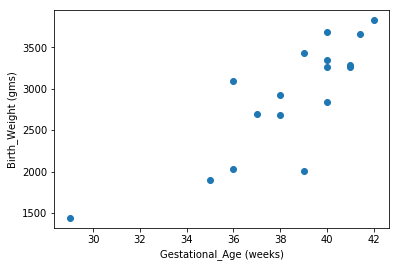

In [145]:
plt.scatter(gs['Gestational_Age'],gs['Birth_Weight'])
plt.xlabel('Gestational_Age (weeks)')
plt.ylabel('Birth_Weight (gms)')
plt.show()

When Gestational_Age (weeks) increased there was an increase in Birth_Weight (gms)

In [25]:
from scipy import stats
#slope, intercept, r_value, p_value, slope_std_error = stats.linregress(gs['Gestational_Age'],gs['Birth_Weight'])

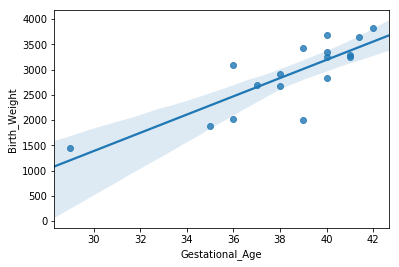

In [146]:
mysns=sns.regplot(x=gs['Gestational_Age'],y=gs['Birth_Weight'])

# Does the scatter plot confirm the correlation value you calculated? Does there seem to be a strong correlation between the two predictors?

Yes , there is a strong ~1 positive correlation between the 2 variables.
When Gestational_Age (weeks) increased there was an increase in Birth_Weight (gms).
But Correlation does not imply causation. Correlation just measures the strength of linear relationship

# Perform a hypothesis test and state the confidence level at which you can confirm a correlation between the two variables (use the scipy.stats.pearsonr() function

The Pearson correlation coefficient measures the linear relationship between two datasets. 

Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. 

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

Returns:
r : float
    Pearson's correlation coefficient
p-value : float
    2-tailed p-value

In [147]:
from scipy.stats import pearsonr

In [148]:
r_ceoff,pval=pearsonr(gs['Gestational_Age'],gs['Birth_Weight'])

In [151]:
print("Coeff of Correlation: ", r_ceoff)

Coeff of Correlation:  0.8197828031536366


In [154]:
print("Probability of Random-Chance",pval," or " , round(pval ,4))

Probability of Random-Chance 5.6210785283336966e-05  or  0.0001


Suppose,

Null Hypothesis H0 is that there is no relation between Gestational Age and Birth Weight. What we observe is just due to random chance.

Alternate hypothesis Ha will state that there is a relation between Gestational Age and Birth Weight.

If our significance level is 0.05 (5%) , then p-value is lesser than 0.05 at 0.0001 which means we reject the H0 and state with 95% confidence that there is a significant relationship between Gestational Age and Birth Weight.

# Thank you !